In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │             286 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,356 (5.30 KB)

 Trainable params: 1,356 (5.30 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/40 ━━━━━━━━━━━━━━━━━━━━ 21s 542ms/step - accuracy: 0.0625 - loss: 3.3061
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0498 - loss: 3.2701 - val_accuracy: 0.1474 - val_loss: 3.2029
Epoch 2/1000
 1/40 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0547 - loss: 3.2227
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0808 - loss: 3.1999 - val_accuracy: 0.1114 - val_loss: 3.1122
Epoch 3/1000
 1/40 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0625 - loss: 3.1687
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0984 - loss: 3.1040 - val_accuracy: 0.1362 - val_loss: 2.9302
Epoch 4/1000
 1/40 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0938 - loss: 3.0181
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.8744 - loss: 0.6054


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[1.12093622e-02 1.57546923e-02 3.01302248e-03 7.90248904e-03
 4.08951715e-02 3.94165814e-02 2.42498973e-05 1.04102164e-05
 6.69944525e-01 1.02161154e-01 4.49852735e-07 1.19471010e-02
 3.53534560e-04 1.62896902e-06 2.37385277e-03 1.02491825e-07
 1.63544610e-04 7.34812522e-09 3.24394442e-02 3.11140227e-03
 2.78234873e-13 1.22096940e-13 3.84495351e-08 2.73162414e-07
 5.92768267e-02 1.53960883e-07]
8


# Confusion matrix

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step


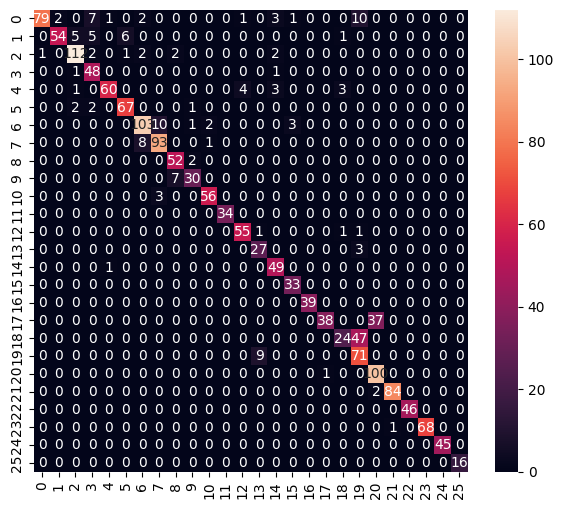

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       106
           1       0.96      0.76      0.85        71
           2       0.93      0.92      0.92       122
           3       0.75      0.96      0.84        50
           4       0.97      0.85      0.90        71
           5       0.91      0.93      0.92        72
           6       0.90      0.87      0.88       119
           7       0.88      0.91      0.89       102
           8       0.85      0.96      0.90        54
           9       0.88      0.81      0.85        37
          10       0.95      0.95      0.95        59
          11       1.00      1.00      1.00        34
          12       0.92      0.95      0.93        58
          13       0.73      0.90      0.81        30
          14       0.84      0.98      0.91        50
          15       0.89      1.00      0.94        33
          16       1.00      1.00      1.00        39
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\rocks\AppData\Local\Temp\tmpvblhmcii\assets


INFO:tensorflow:Assets written to: C:\Users\rocks\AppData\Local\Temp\tmpvblhmcii\assets


Saved artifact at 'C:\Users\rocks\AppData\Local\Temp\tmpvblhmcii'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  2848990028976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2849024312944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2849024323856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2849024320688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2849024325792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2849024326496: TensorSpec(shape=(), dtype=tf.resource, name=None)


7504

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.12093631e-02 1.57546792e-02 3.01301968e-03 7.90247507e-03
 4.08951752e-02 3.94165479e-02 2.42498991e-05 1.04101964e-05
 6.69944584e-01 1.02161162e-01 4.49851910e-07 1.19470907e-02
 3.53534386e-04 1.62896765e-06 2.37385067e-03 1.02491434e-07
 1.63544464e-04 7.34809724e-09 3.24394554e-02 3.11140111e-03
 2.78233843e-13 1.22096709e-13 3.84495351e-08 2.73162414e-07
 5.92767745e-02 1.53960897e-07]
8
